In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [25]:
df = pd.read_csv("./data/fashion/fashion-mnist_train.zip")

In [26]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
X = df.iloc[:,1:]

In [28]:
pca=PCA(n_components=0.99)

In [29]:
pca.fit(X)

PCA(n_components=0.99)

In [30]:
X_pca = pca.transform(X)

In [31]:
X_pca.shape

(60000, 459)

In [32]:
X.shape

(60000, 784)

In [33]:
pca.explained_variance_ratio_ # List of variance explained by each component

array([2.90113534e-01, 1.77276684e-01, 6.02269951e-02, 4.97027175e-02,
       3.83928870e-02, 3.47099665e-02, 2.34404392e-02, 1.91393731e-02,
       1.34360546e-02, 1.31072469e-02, 9.89790058e-03, 9.14050194e-03,
       7.65205926e-03, 6.60426603e-03, 6.09188058e-03, 5.91505566e-03,
       5.52045752e-03, 5.30489975e-03, 4.59958513e-03, 4.55534456e-03,
       4.32822772e-03, 4.06102821e-03, 3.83469449e-03, 3.74220867e-03,
       3.61876698e-03, 3.50909656e-03, 3.33585882e-03, 3.18695876e-03,
       3.09618851e-03, 2.95278348e-03, 2.76008367e-03, 2.65339233e-03,
       2.62962261e-03, 2.57680000e-03, 2.47560374e-03, 2.38412925e-03,
       2.30074999e-03, 2.24349468e-03, 2.19127657e-03, 2.09739139e-03,
       2.00785598e-03, 1.97571699e-03, 1.94213649e-03, 1.83775815e-03,
       1.75781769e-03, 1.71549532e-03, 1.68051284e-03, 1.63923957e-03,
       1.62220887e-03, 1.56038698e-03, 1.53962495e-03, 1.50808666e-03,
       1.47631924e-03, 1.42855370e-03, 1.38375454e-03, 1.37028358e-03,
      

In [34]:
np.sum(pca.explained_variance_ratio_)

0.9900425020401571

In [36]:
X_pca[0].shape

(459,)

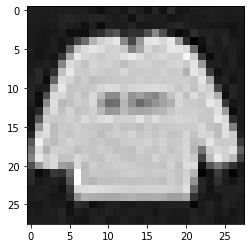

In [40]:
plt.imshow(pca.inverse_transform(X_pca[0]).reshape(28,28), cmap='gray')

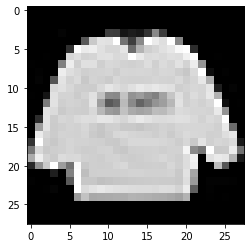

In [42]:
plt.imshow(X.values[0].reshape(28,28), cmap='gray')

### Possible uses of PCA

- Compression (reconstruction is quite good).
- Use `X_pca` instead of `X` for training a model (either supervised / unsupervised learning task).
- Visualiza the data better.

In [77]:
from matplotlib import colors
labels = [1,5]# sorted(df['label'].unique())
colors = ['black','red'] #list(colors.CSS4_COLORS)[0:len(labels)]

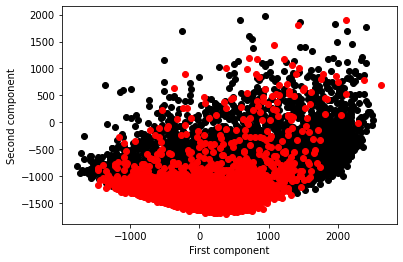

In [78]:
for i, color in enumerate(colors): #get index and value on the list (iterable)
    x1 = X_pca[:,0][df['label'] == i]
    x2 = X_pca[:,1][df['label'] == i]
    plt.scatter(x1,x2,c=color)
    plt.xlabel("First component")
    plt.ylabel("Second component")

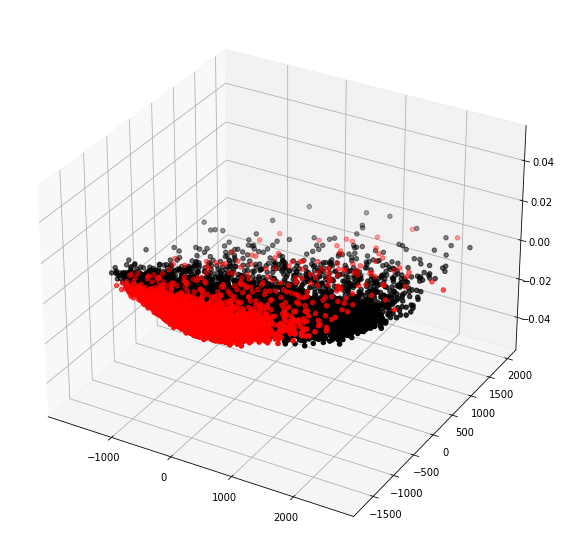

In [83]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
for i, color in enumerate(colors): #get index and value on the list (iterable)
    x1 = X_pca[:,0][df['label'] == i]
    x2 = X_pca[:,1][df['label'] == i]
    x3 = X_pca[:,2][df['label'] == i]
    ax.scatter(x1,x2,c=color)